In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
# Define the neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D vector
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU activation
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer='adam',                 # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']              # Performance metric
)


In [7]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=10,        # Number of epochs
    batch_size=32     # Mini-batch size
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8753 - loss: 0.4297 - val_accuracy: 0.9603 - val_loss: 0.1294
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9676 - loss: 0.1078 - val_accuracy: 0.9704 - val_loss: 0.0982
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9791 - loss: 0.0676 - val_accuracy: 0.9707 - val_loss: 0.0899
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9839 - loss: 0.0494 - val_accuracy: 0.9795 - val_loss: 0.0673
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9763 - val_loss: 0.0813
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9900 - loss: 0.0318 - val_accuracy: 0.9753 - val_loss: 0.0917
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9760 - val_loss: 0.0921
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9928 - loss: 0.0219

In [8]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 - 0s - 1ms/step - accuracy: 0.9786 - loss: 0.0914
Test Accuracy: 97.86%


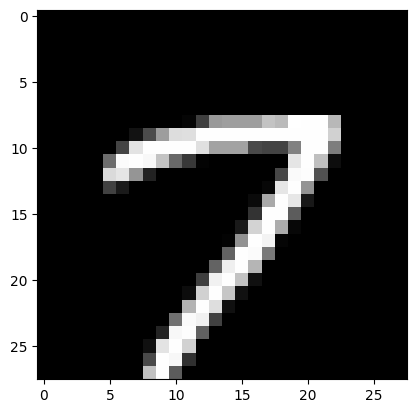

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted label: 7


In [9]:
# Predict on a single test example
import numpy as np
import matplotlib.pyplot as plt

random_idx = np.random.randint(0, len(x_test))
plt.imshow(x_test[random_idx], cmap='gray')
plt.show()

prediction = model.predict(x_test[random_idx].reshape(1, 28, 28))
print(f"Predicted label: {prediction.argmax()}")
